Мой проект по анализу данных будет по фильмам, данные возьму с популярных кинопорталов. Я буду использовать Python для сбора, обработки и этапов анализа данных. 

Первый этап проекта будет состоять в том, чтобы собрать данные о фильмах с кинопортала. Я буду использовать pandas для анализа данных по фильмам:
- посмотрим на то, какая средняя оценка у разных жанров 
- посмотрим как год влияем на рейтинг
- посмотрим как продолжительность фильма влияет на общий рейтинг
- можем использовать среднее скользящее для того, чтобы посмотреть на среднюю продолжительности фильмов
- посмотрим на экстримальные значения, то есть создадим новую колонку , в которой будет отношение продолжительности 1 фильма к средней продолжительности
- и многое другое

Мой план - использовать Python для парсинга информации о 
фильмах с сайта, таких как IMDb, Кинопоиск. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import os
import time
import re
from lxml import html


Если вы открываете это в гугл коллабе, то вам нужно подгрузить все последующие БД в среду выполнения.

In [ ]:
#Берем данные о фильмах с сайта https://www.kaggle.com/datasets/stefanoleone992/filmtv-movies-dataset?resource=download

df = pd.read_csv("/filmtv_movies - ENG.csv", engine="python",error_bad_lines=False)


<ipython-input-2-ed412411ef99>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("/filmtv_movies - ENG.csv", engine="python",error_bad_lines=False)
Skipping line 15326: unexpected end of data


In [ ]:
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


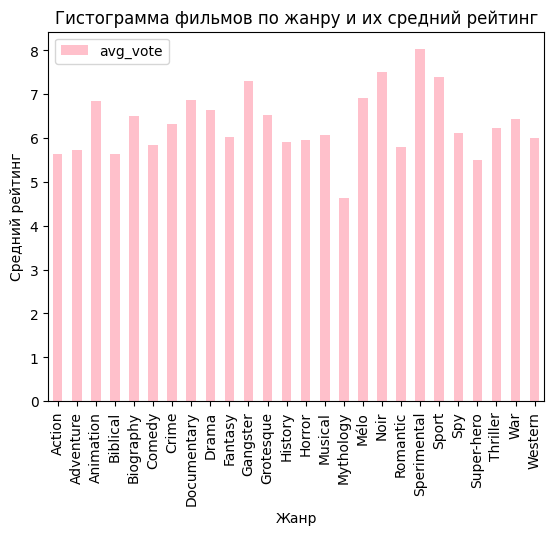

In [ ]:
#Посмотрим на рейтинги фильмов по жанру, построив гистограмму
df_grouped = df.groupby("genre")[["avg_vote"]].mean()
pd.DataFrame(df_grouped)
df_grouped.plot(kind='bar', color = 'pink')
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг')
plt.title('Гистограмма фильмов по жанру и их средний рейтинг')
plt.xticks(rotation='vertical')
plt.show()


Как можно заметить, самый высокий средний рейтинг оказался у жанра: экспериментальный(для меня это было удивительно, я думала, что будет комедия или боевик). На втором месте драмма (это уже было ожидаемо).

Теперь давайте посмотрим как влияет год выпуска фильма на его общие голоса

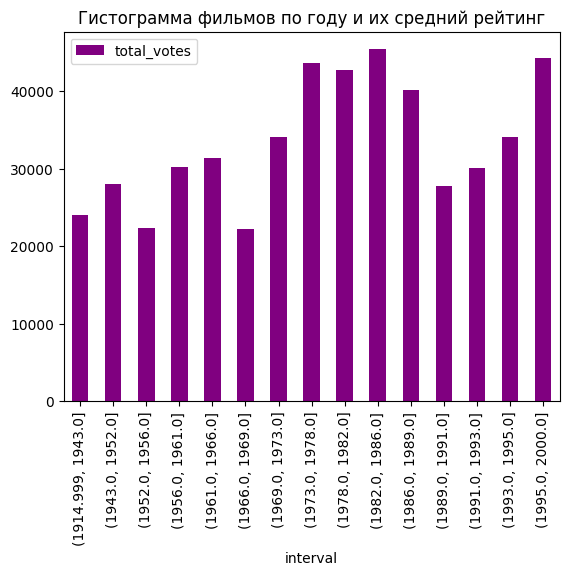

In [ ]:
#Разделим сначала все года на равные интервалы, пускай их будет 15
df["interval"] = pd.qcut(df["year"], q = 15)

#Создаем новый дата фрейм, используя группировку по интервалам и суммируем все голоса
df_years = df.groupby("interval")[["total_votes"]].sum()
pd.DataFrame(df_years)

#Строим график
df_years.plot(kind='bar', subplots=True, color = "purple")
plt.title('Гистограмма фильмов по году и их средний рейтинг')
plt.xticks(rotation='vertical')
plt.show()


Как можно заметить, чем старше фильм, тем меньше у него голосов 

Что мы еще можем посмотреть из интересного? Я предлагаю построить тепловую карту, используя общий рейтинг и продолжительность. Посмотрим как продолжительность фильма влияет на общий рейтинг.


<Axes: ylabel='duration'>

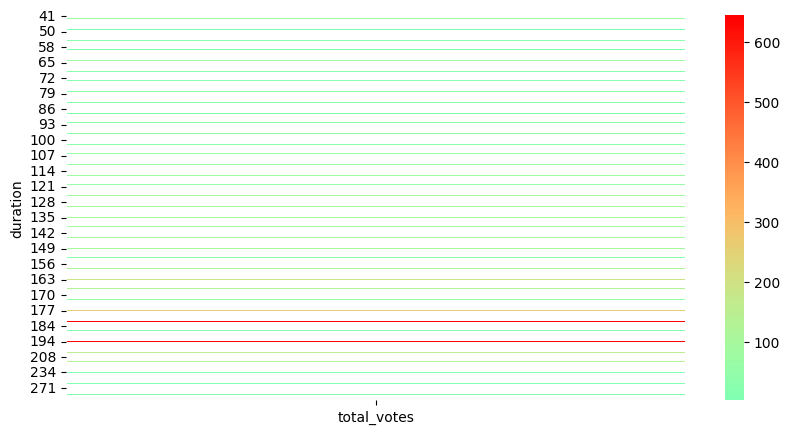

In [ ]:
#Создадим отдельную табличку
df_new = df.groupby("duration")[["total_votes"]].mean()
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_new, center = 0, cmap = "rainbow", linewidths= .3)


Можно заметить, что наибольшее количество голосов набрали фильмы с продолжительностью 170, 194, то есть примерно в этом диапозоне чаще всего ставят больше голосов.

Давайте проанализируем продолжительность фильма, используя скользящее среднее для того, чтобы понять срднюю продолжительность за этот период времени.


In [ ]:
df["duration"].rolling(window = 2).mean()

0          NaN
1         87.0
2         94.5
3         93.0
4         90.0
         ...  
11365     91.0
11366     88.0
11367    102.0
11368    105.0
11369     90.0
Name: duration, Length: 11370, dtype: float64

Давайте посмотрим также на соотношения продолжительности одного фильма к скользящему среднему и выделим экстремальные моменты. давайте используем boxplot для этого: посмотрим на медианные значения, выбросы, максимальное и минимальное значения.


Text(0, 0.5, 'Duration ratio')

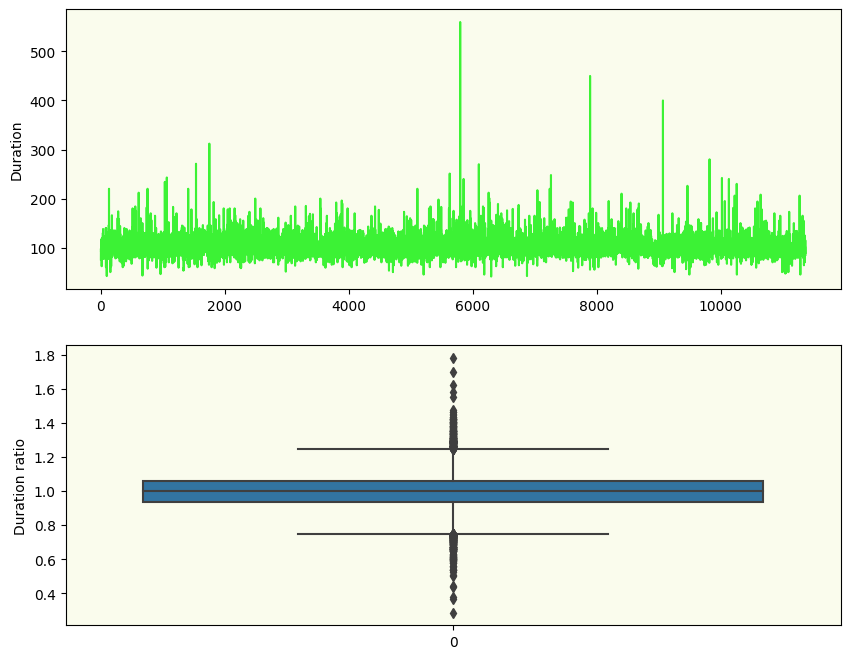

In [ ]:
rolling = df["duration"].rolling(window = 2).mean()
df["ratio_duration"] = df["duration"]/rolling

#Создаем фигуру с 2 частями
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
ax[1].set_facecolor("#fafced")
ax[0].set_facecolor("#fafced")

#Строим график продолжительности на 1 части графика, а на второй части строим отношение продолжительности к среднему скользящему
df["duration"].plot(ax=ax[0], color = "#3cf235")
df["ratio_duration"].plot(ax=ax[1], color = "#3cf235")

#Добавляем на 2 график "boxplot" для отношения и обозначаем названия для 2 частей
#boxplot - помогает нам посмотреть на нетипичные наблюдения
sns.boxplot(df["ratio_duration"])
ax[0].set_ylabel('Duration')
ax[1].set_ylabel('Duration ratio')

Мне кажется, что из этого дата фрейма мы в целом взяли все интресное, так что давайте найдет другой, в котором будет бюджет фильма, выручка (или какие-то более статистические данные по фильмам)

In [ ]:
#данные берем по ссылке: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

df_budget = pd.read_csv("/movies_metadata.csv", engine="python",error_bad_lines=False)


<ipython-input-4-37413c5ea229>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_budget = pd.read_csv("/movies_metadata.csv", engine="python",error_bad_lines=False)


In [ ]:
df_budget.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Давайте посчитаем корреляцию между доходом фильма и его бюджетом

In [ ]:
np.corrcoef(df_budget['budget'], df_budget['revenue'])

array([[1.        , 0.73548295],
       [0.73548295, 1.        ]])

Давайте сделаем график зависимости продолжительности фильма и его дохода , а также выведем коэфициент корреляции между ними.

Коэффициент корреляции: 0.15


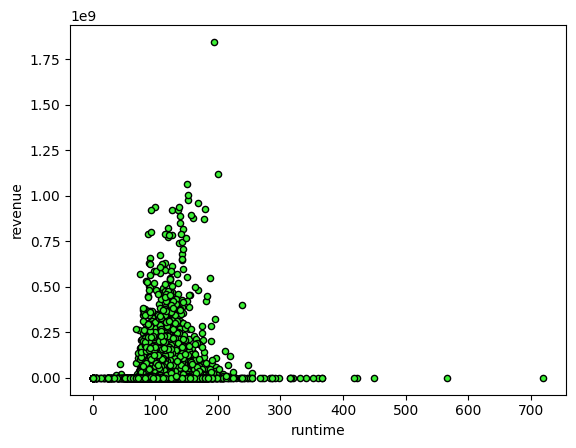

In [ ]:
df_budget.plot.scatter(x='runtime', y='revenue', color = "#3cf235", edgecolors = "black" )
corr = df_budget['runtime'].corr(df_budget['revenue'])
print(f'Коэффициент корреляции: {corr:.2f}')

Ну корреляция небольшая, но все-таки она имеется.


Давайте посмотрим теперь как колличество слов в названии фильма влияет на рейтинг 😧

In [ ]:
#Создадим новый столбец в дата фрейм с колличеством слов в названии фильма
#Можно сделать с помощью str.count(" ") - но так выдает только колличество пробелов, поэтому в документации я нашла str.split()
# и если приписать apply(len) - тогда мы сможем получить колличество слов
df_budget["count_words"] = df_budget['original_title'].str.split().apply(len)
df_budget.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,count_words
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415,2
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413,1
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92,3
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34,3
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173,6


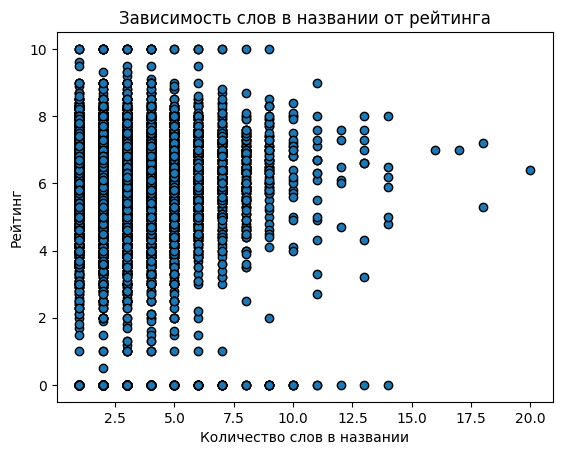

In [ ]:
# мы посчитали колличество слов в названии теперь можем построить график зависимости слов в названии от рейтинга
x = df_budget["vote_average"]
y = df_budget["count_words"]
plt.scatter(y, x, edgecolors = "black")
plt.xlabel("Количество слов в названии")
plt.ylabel("Рейтинг")
plt.title("Зависимость слов в названии от рейтинга")
plt.show()

Самые высокие рейтинги , когда в фильме от 1-9 слов. Но как будто этого не достаточно для того,чтобы это утверждать. Давайте проведем более глубокий анализ. Мы можем сделать линейную регрессию и проверить значимость нашего теста 

In [ ]:
from os import X_OK
import statsmodels.api as sm
# Предиктор - count_words, целевой показатель -  рейтинг
X = df_budget[['count_words']]
y = df_budget['vote_average']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           vote_average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           6.75e-05
Time:                        21:08:47   Log-Likelihood:                -35193.
No. Observations:               19606   AIC:                         7.039e+04
Df Residuals:                   19604   BIC:                         7.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0898      0.020    298.211      

Как строить линейную регрессию с данной бибилиотекой, я посмотрела в документации библиотеки и на хабре. Давайте оценим результат нашей статистики: так как у нас p-value < 0,05 , значит, что наша модель линейной регресии значима, то есть зависимость между количеством слов в названии фильма и его рейтингом существует. Документация: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS


Давайте спарсим данные с кинопоиска или IMDb. Посмотрим на топовые фильмы (топ 250) с сайта и сделаем дата фрейм. Так как этот сайт не предоставляет возможности спарсить всю базу данных, едиснтвенное, что я смогла, так это взять данные из топа 250 фильмов с этого сайта.

In [ ]:
from pandas.core.common import fill_missing_names
import urllib, requests, socket, re, lxml, io, bs4
import urllib.request

url = 'https://www.imdb.com/chart/top'
response = requests.get(url)
bs = BeautifulSoup(response.text, 'html.parser')

film = []
table = bs.find('tbody', {'class': 'lister-list'})
rows = table.find_all('tr')
for row in rows:
    title_column = row.find('td', {'class': 'titleColumn'})
    title = title_column.find('a').text
    year = title_column.find('span', {'class': 'secondaryInfo'}).text.strip('()')
    rating = row.find('td', {'class': 'ratingColumn'}).text.strip()
    film.append({'title': title, 'year': year, 'rating': rating})


df_web = pd.DataFrame(film)

print(df_web)

                        title  year rating
0    The Shawshank Redemption  1994    9.2
1               The Godfather  1972    9.2
2             The Dark Knight  2008    9.0
3       The Godfather Part II  1974    9.0
4                12 Angry Men  1957    9.0
..                        ...   ...    ...
245                  The Help  2011    8.0
246             Life of Brian  1979    8.0
247            The Iron Giant  1999    8.0
248                   Aladdin  1992    8.0
249                  Drishyam  2015    8.0

[250 rows x 3 columns]


Ну вот мы и посмотрели на все топовые фильмы с сайта, но хотелось бы как то получить еще побольше данных по фильмам, например, их локация. К сожалению, данные по кинотеатрам очень тяжело найти и спарсить. Поэтому нужно подумать, где взять хоть какие-то данные с локацией, поэтому можно использовать геопандас: вводить адрес города и кинотеатра, потом вводит город и ближайшее здание рядом, и потом программа будет выдавать расстояние между кинотеатром и местом. Код с расстоянием между 2 точками, я посмотрела на Habr.
Он работает немного криво, но хоть что-то)) Я пыталась 😊


In [ ]:
from geopy.geocoders import Nominatim 
from geopy.distance import geodesic

geolocator = Nominatim(user_agent="Tester", timeout = 10) 

kino = str(input('Введите город и кинотеатр: \n')) 
my_ad = str(input('Введите город и рядом здание: \n')) 
location_1 = geolocator.geocode(kino) 
location_2 = geolocator.geocode(my_ad) 
### FROM: https://lavrynenko.com/koordinaty-mesta-po-ego-adresu/
print('Адрес 1: ', location_1) 
print('Адрес 2: ', location_2) 
print('Координаты 1: ', location_1.latitude, location_1.longitude) 
gps_point_1 = location_1.latitude, location_1.longitude 
gps_point_2 = location_2.latitude, location_2.longitude 
print('Координаты 2: ', location_2.latitude, location_2.longitude) 
print('Дистанция между ', location_1, 'и', location_2, ': ', geodesic(gps_point_1, gps_point_2).kilometers, ' километров')
### END FROM

Введите город и кинотеатр: 
Russia, Moscow, Cinema Star
Введите город и свой адрес: 
Russia, Moscow, Kremlin
Адрес 1:  Синема Стар, Ленинский проспект, Обручевский район, Москва, Центральный федеральный округ, 119421, Россия
Адрес 2:  Kremlin, Пятницкая улица, район Замоскворечье, Москва, Центральный федеральный округ, 115035, Россия
Координаты 1:  55.6635241 37.5106041
Координаты 2:  55.7438837 37.627564
Дистанция между  Синема Стар, Ленинский проспект, Обручевский район, Москва, Центральный федеральный округ, 119421, Россия и Kremlin, Пятницкая улица, район Замоскворечье, Москва, Центральный федеральный округ, 115035, Россия :  11.580896804539925  километров


Что можно еще можно придумать по данной теме? Я думаю, что было бы круто написать бота для телеграмма по фильмам.

In [20]:
#скачиваем библиотеку для работы с телеграмм ботом на питоне
!pip install pytelegrambotapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Я взяла неофициальный api кинопоиска и подключила его к телеграмм боту, чтобы по названию фильма он выдавал его описание, год, жанр, и рейтинг на кинопоиске. Там всего 200 попыток с 1 ключом, если при запуске этого бота что-то не сработало, просто получите новый ключ по ссылке: @kinopoiskdev_bot
и вставьте его в строку кода: headers = {"X-API-KEY": "ВАШ КЛЮЧ"}. параметры сортировки брала из документации этого api: https://api.kinopoisk.dev/v1/documentation#/default/AppController_check

In [28]:
import json
import telebot
from telebot import types
import sqlite3

bot = telebot.TeleBot('5409662148:AAGIYvoi9l-Ui6fkJPdi_lyJmydesSzqeWg') # мы в тг нашли бот для создания ботов и получили наш токен для бота

@bot.message_handler(commands=['start'])
def send_welcome(message):
    bot.reply_to(message, 'Привет! Я могу показать рейтинг и жанр фильмов. Введите название фильма:')

@bot.message_handler(func=lambda message: True)
def send_movie_info(message):
    movie_name = message.text
    headers = {"X-API-KEY": "3N6T4KH-MRF486X-M0VESNG-FHW58DS"}
    params = {'name': movie_name}
    response = requests.get('https://api.kinopoisk.dev/v1.3/movie', headers=headers, params=params)
    new = json.loads(response.text)
    
    for movie in new['docs']:
        movie_id = movie['id']
        movie_url = f'https://api.kinopoisk.dev/v1.3/movie/{movie_id}'
        response_1 = requests.get(movie_url, headers=headers)
        new_1 = json.loads(response_1.text)
        rating = new_1['rating']['kp']
        genres = new_1['genres']
        description = new_1['description']
        year = new_1['year']
        bot.reply_to(message, f'Рейтинг: {rating}\nЖанр: {genres}\nОписание: {description}\nГод: {year}')
        break  
    
    #делаем кнопки для оценки
    keyboard = types.InlineKeyboardMarkup()
    keyboard.add(*[types.InlineKeyboardButton(text=str(i), callback_data=str(i)) for i in range(1, 11)])
    bot.send_message(message.chat.id, "Поставьте оценку этому фильму:", reply_markup=keyboard)
    

#чтобы бот принимал наш ответ (нажатие на оценку и выводил)
@bot.callback_query_handler(func=lambda call: True)
def callback_handler(call):
    rating = call.data
    bot.answer_callback_query(callback_query_id=call.id, text=f"Вы поставили фильму рейтинг {rating} из 10")
    bot.send_message(chat_id=call.message.chat.id, text=f"Вы поставили фильму рейтинг {rating} из 10.")


""" 
    #Создаем базу данных с оценками
    bd = sqlite3.connect('new_bd.sql')
    cur = bd.cursor()
    cur.execute('CREATE TABLE IF NOT EXISTS ratings(id int auto_increment primary key, name varchar(50), rating varchar(10))')
    bd.commit()
    cur.close()
    bd.close()
    bot.register_message_handler(call.message.chat.id, rating)
movie_name = ''
def movie_name(message):
    global movie_name 
    movie_name = message.text
    bot.register_next_step_handler(message, movie_name)
    bd = sqlite3.connect('new_bd.sql')
    cur = bd.cursor()
    cur.execute("INSERT INTO ratings(rating, name) VALUES('%s','%s')" % (rating, movie_name))
    bd.commit()
    cur.close()
    bd.close()

    markup = telebot.types.InlineKeyboardMarkup()
    markup.add(telebot.types.InlineKeyboardButton('Список оценок', callback_data= 'list'))
    bot.send_message(message.chat_id,'Спасибо за оценку', reply_markup=markup )

"""

bot.polling(none_stop=True, interval=0)

Чтобы запустить этого бота нужно чтобы вы запустили эту ячейку с кодом и открыли бота в тг: https://t.me/Film_Polina_Bot

На самом деле можно было бы подключить сюда sql и записывать все оценки, которые поставили пользователи на фильм в БД. У меня не получилось это реализовать, но код отчасти был реализован и показывал создание нового sql файла, но кнопку "Список оценок" не выдавал, скорее всего я что-то упустила и поэтому он дальше не работал. Я закоментила код, который подключал бы базу данных.